In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from datetime import datetime,timezone

In [11]:
test=pd.read_csv('dataset\P02\EARBUDS\P02-imu-right.csv')
test

,timestamp,ax,ay,az,gx,gy,gz
0,1637860540063,-4833,14299,-5882,11,-13,-27
1,1637860540072,-4834,14318,-5901,11,-20,-29
2,1637860540082,-4827,14301,-5925,12,-23,-25
3,1637860540092,-4835,14278,-5923,19,-19,-21
4,1637860540101,-4832,14244,-5902,25,-15,-16
...,...,...,...,...,...,...,...
289642,1637863262161,13650,-3695,8304,-3,-17,24
289643,1637863262171,13665,-3686,8295,-9,-16,26
289644,1637863262181,13660,-3675,8307,-18,-17,23
289645,1637863262190,13650,-3699,8296,-19,-16,23


In [12]:
test

,timestamp,ax,ay,az,gx,gy,gz
0,1637860540063,-4833,14299,-5882,11,-13,-27
1,1637860540072,-4834,14318,-5901,11,-20,-29
2,1637860540082,-4827,14301,-5925,12,-23,-25
3,1637860540092,-4835,14278,-5923,19,-19,-21
4,1637860540101,-4832,14244,-5902,25,-15,-16
...,...,...,...,...,...,...,...
289642,1637863262161,13650,-3695,8304,-3,-17,24
289643,1637863262171,13665,-3686,8295,-9,-16,26
289644,1637863262181,13660,-3675,8307,-18,-17,23
289645,1637863262190,13650,-3699,8296,-19,-16,23


In [13]:
import pandas as pd
datas=[]
def do_label(df, lowerlimit, upperlimit, label):
    # Use boolean indexing to assign the label within the specified timestamp range
    df.loc[(df['timestamp'] >= lowerlimit) & (df['timestamp'] <= upperlimit), 'Label'] = label
    return df

def convert_to_unix_gmt(time):
    time=str(time)
    datetime_string = time
    datetime_object = datetime.strptime(datetime_string, "%Y-%m-%d %H:%M:%S")
    unix_timestamp = int(datetime_object.replace(tzinfo=timezone.utc).timestamp() * 1000)
    return unix_timestamp

def fullextraction():
    study_data = pd.read_csv("dataset/Study_Information.csv")
    
    for i in range(1, 18):
        if i < 10:
            person = "P0" + str(i)
        else:
            person = "P" + str(i)

        path = f"dataset/{person}/EARBUDS/{person}-imu-right.csv"
        data = pd.read_csv(path, low_memory=False)

        data = data.sort_values(by='timestamp', ascending=True)
        data['Label'] = 0

        row = study_data[study_data['Participant'] == person]
        
        data = do_label(data, convert_to_unix_gmt(row["Start_Sit"].values[0]),    convert_to_unix_gmt(row["Start_Stand"].values[0]), 1)
        data = do_label(data, convert_to_unix_gmt(row["Start_Stand"].values[0]),   convert_to_unix_gmt(row["Start_Cycle1"].values[0]), 2)
        data = do_label(data, convert_to_unix_gmt(row["Start_Cycle1"].values[0]),  convert_to_unix_gmt(row["Start_Cycle2"].values[0]), 3)
        data = do_label(data, convert_to_unix_gmt(row["Start_Cycle2"].values[0]),  convert_to_unix_gmt(row["Start_Run1"].values[0]), 4)
        data = do_label(data, convert_to_unix_gmt(row["Start_Run1"].values[0]),    convert_to_unix_gmt(row["Start_Run2"].values[0]), 5)
        data = do_label(data, convert_to_unix_gmt(row["Start_Run2"].values[0]),    (data['timestamp'].iloc[-1]), 6)

        filtered_data = data[data['Label'] != 0]

        print(i)
        print(filtered_data)
        datas.append(filtered_data)
        print(filtered_data['Label'].value_counts())
        filtered_data.to_csv(f"{person}-imu-right.csv",index=False)
fullextraction()


1
            timestamp    ax     ay    az  gx   gy  gz  Label
0       1638550730008  2294  16028  1162 -24   41 -58      1
1       1638550730018  2304  16050  1176 -14   28 -53      1
2       1638550730027  2301  16051  1176  -7   12 -40      1
3       1638550730037  2284  16054  1200   1   -8 -36      1
4       1638550730047  2270  16048  1191  10  -26 -28      1
...               ...   ...    ...   ...  ..  ...  ..    ...
191703  1638552570357  3292  15187  4645 -75   67  60      6
191704  1638552570367  3326  15226  4632 -82   70  38      6
191705  1638552570376  3363  15260  4629 -85   97  30      6
191706  1638552570386  3384  15290  4667 -77  134  36      6
191707  1638552570395  3376  15291  4703 -67  149  58      6

[191707 rows x 8 columns]
6    40667
2    31250
4    31250
5    31250
3    31249
1    26041
Name: Label, dtype: int64
2
            timestamp     ax     ay    az  gx  gy  gz  Label
14417   1637860620001  -5062  14397 -5444   2 -48  38      1
14418   1637860620011  

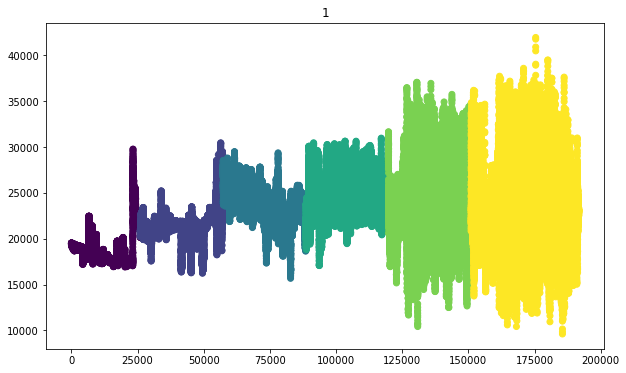

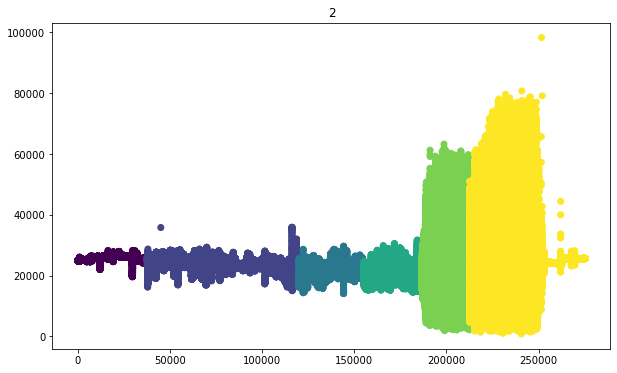

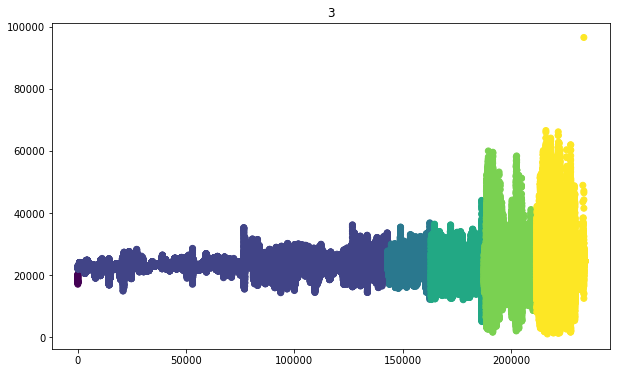

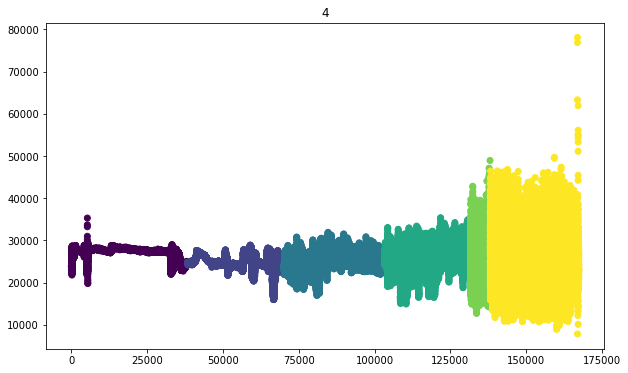

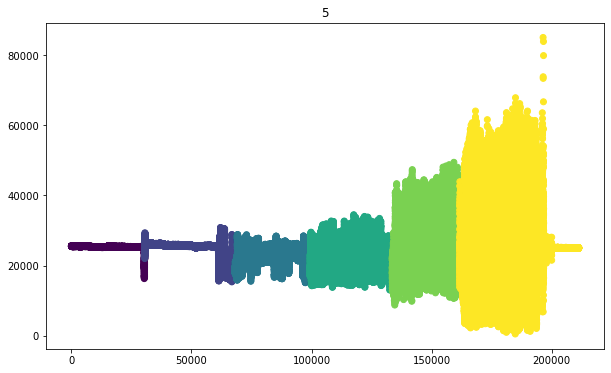

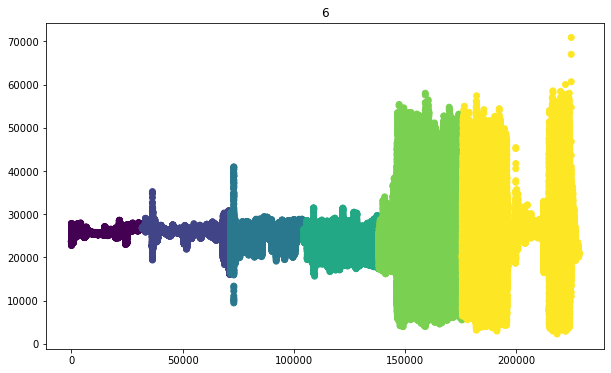

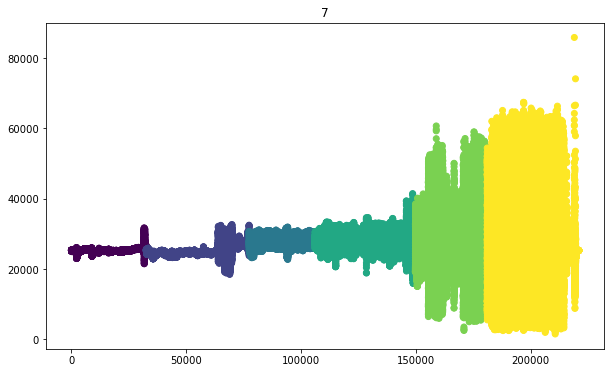

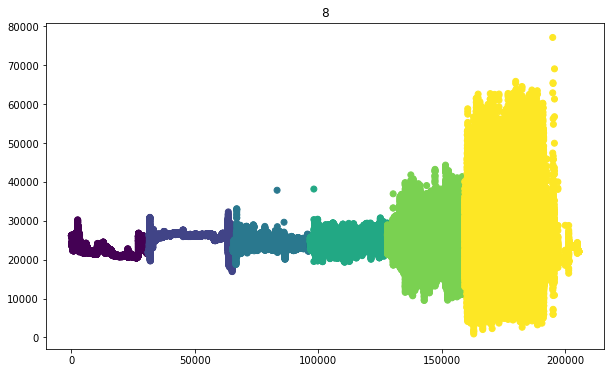

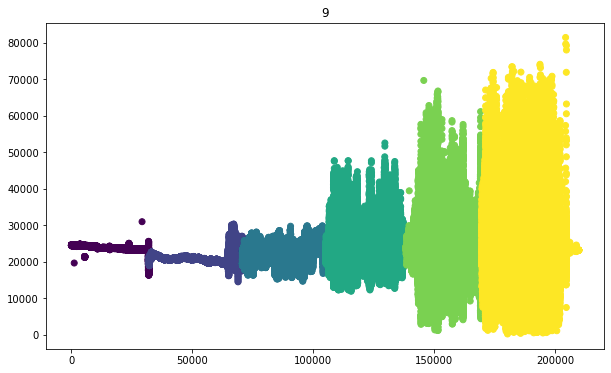

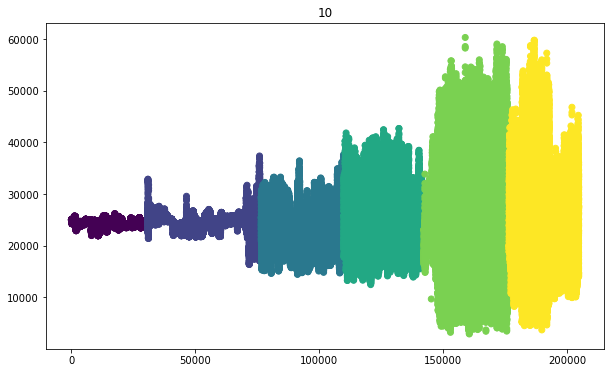

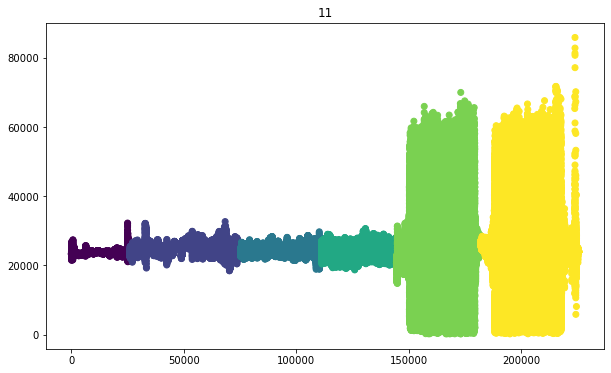

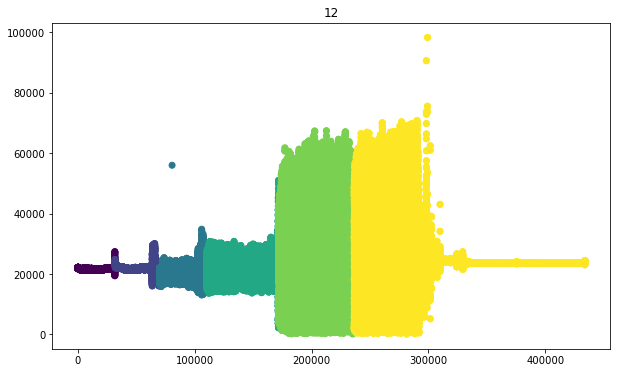

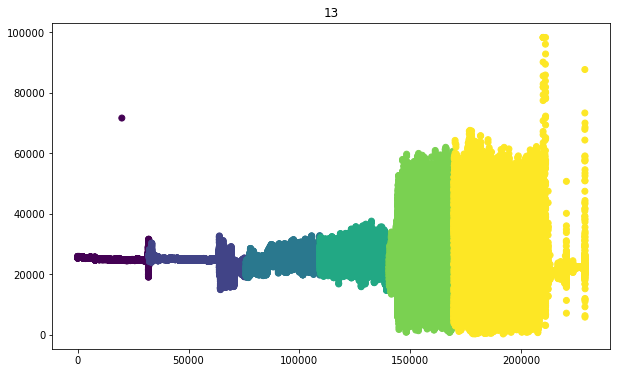

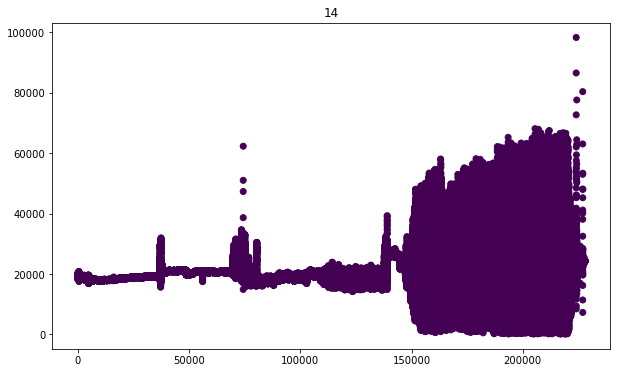

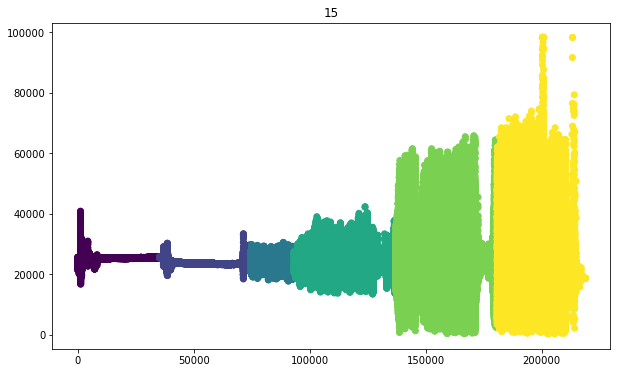

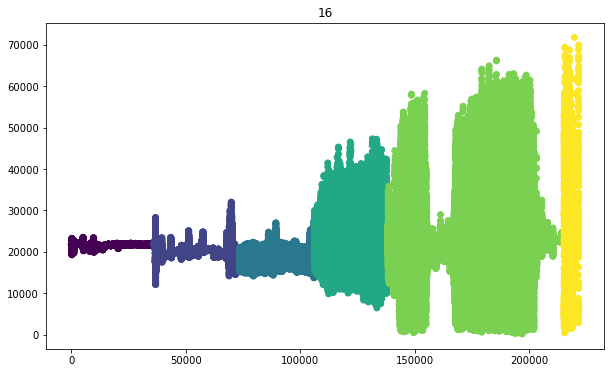

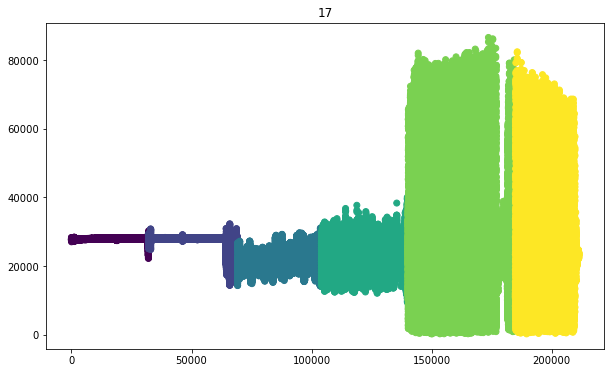

In [15]:
for index,f_data in enumerate(datas):
    x_axis=np.arange(1,len(f_data)+1)
    y_axis=abs(f_data['ax'].values[:])+abs(f_data['az'].values[:])+abs(f_data['ay'].values[:])
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis,y_axis,c=f_data['Label'],cmap='viridis')
    plt.title(str(index+1))
    plt.show()